# 4th Semester Exam Questions

## Question 1
Solve by using Euler's method:
$$ \frac{d^2y}{dx^2} +y = 0 $$
Given: $y(0)=1$ and $y'(0)=0$.

### Solution:
$$ \frac{dy}{dx} = f(x,y) $$

For n intervals between the integration limits $(x_0,x)$, 
$$ x_n = x_0 + nh \quad ; (n = 1,2,3,...) $$
By Euler's Formula, 
$$ y_{n+1} = y_n + hf(x_n, y_n) $$

**Algorithm:**

1. Define the function $f(x,y)$.
2. Set interval and initial values of x and y.
3. Update, $$ y = y + hf(x,y) $$  $$ x = x+h $$
    Iterate this in a loop.
4. Collect the (x,y) data.
5. Plot the graph.

Let,
 $$\frac{dy}{dx} = z$$
So,
$$ \frac{dz}{dx} = -y $$

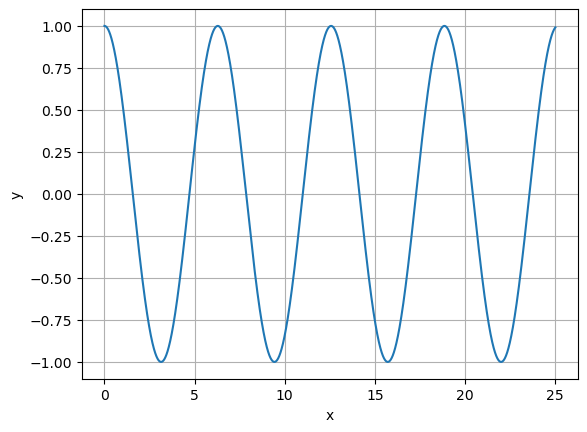

In [1]:
def dydx(x,y,z):
    return z
def dzdx(x,y,z):
    return -y

import matplotlib.pyplot as plt

x, y, z = 0, 1, 0  # given condition
xm = 25
dx = 0.001
xx, yy, zz = [], [], []

while abs(x) < abs(xm):
    x = x + dx
    y = y + dx * dydx(x,y,z)
    z = z + dx * dzdx(x,y,z) 
    xx.append(x)
    yy.append(y)
    zz.append(z)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Question 2
Solve by using Runge Kutta - 4 method:
$$ \frac{dy}{dx} = e^{-x} $$
Given: $y(0)=0$.

### Solution:
Here, the change of y is further modified. Let h and k be the changes in x and y.

$$ k_1 = h f(x,y) $$

$$ k_2 = h f(x + \frac{h}{2}, y + \frac{k_1}{2}) $$

$$ k_3 = h f(x + \frac{h}{2}, y + \frac{k_2}{2}) $$

$$ k_4 = h f(x + h, y + k_3) $$

At last, y should be,
$$ y = y + \frac{1}{6}[k_1 + 2(k_2 + k_3) + k_4] $$

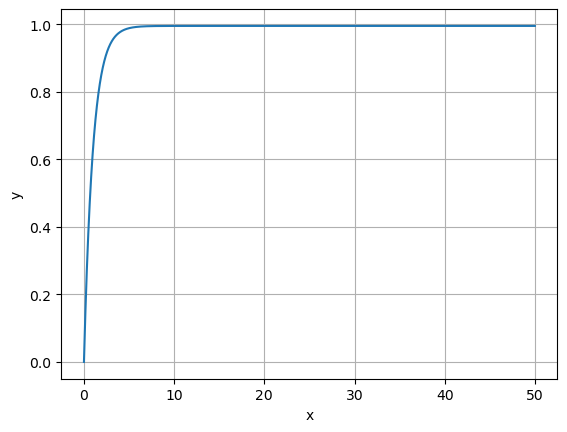

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return np.exp(-x)
    
xm = 50
x, y = 0, 0 # given condition
h = 0.005
xx, yy = [], []

while abs(x) < abs(xm):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Question-3
$ \frac{1}{\sqrt{2 \pi \sigma^2}} \int_0^\infty e^{-\frac{(2-x)^2}{2 \sigma^2}}(x+3) dx $; for $\sigma = 1,0.1,0.01$ and show that the value tends to 5.

In [3]:
import numpy as np
import scipy as sp
from scipy.integrate import simps

sigmas = [1, 0.1, 0.01]  # given values of sigma
for sigma in sigmas:
    xmax = 100  # set the upper limit
    x = np.linspace(0, xmax, int(xmax/sigma))  # set no. of points
    f1 = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(2-x)**2/(2*sigma**2))*(x+3)
    f2 = simps(f1,x)
    print(f'sigma = {sigma} \t value = {f2} \t error = {5-f2}')

sigma = 1 	 value = 4.978300045718836 	 error = 0.021699954281164224
sigma = 0.1 	 value = 5.000000028048047 	 error = -2.8048047440165647e-08
sigma = 0.01 	 value = 5.000000026689211 	 error = -2.668921084136855e-08


So, the value tends to 5.

## Question 4
$$f(x) = -1 \quad; (-\pi \leq x < 0)$$ 
$$= 1 \quad; (0 \leq x < \pi)$$ 
Find the Fourier coefficients.

Fourier Coefficients:
a0 = -0.0008341675008340569
n = 0, 	 a0 = -0.0008341675008340569, 	 b0 = 0.0
n = 1, 	 a1 = 0.0008341675008343749, 	 b1 = 1.2732405940162461
n = 2, 	 a2 = -0.0008341675008340755, 	 b2 = 2.098721623656208e-06
n = 3, 	 a3 = 0.0008341675008343928, 	 b3 = 0.4244163290854335
n = 4, 	 a4 = -0.0008341675008340712, 	 b4 = 4.1982318658349e-06
n = 5, 	 a5 = 0.0008341675008343441, 	 b5 = 0.2546531536714814
n = 6, 	 a6 = -0.0008341675008340659, 	 b6 = 6.299319249466849e-06
n = 7, 	 a7 = 0.0008341675008343574, 	 b7 = 0.18189870379468842
n = 8, 	 a8 = -0.0008341675008340868, 	 b8 = 8.402772107272308e-06
n = 9, 	 a9 = 0.0008341675008343597, 	 b9 = 0.14148049397117393
n = 10, 	 a10 = -0.0008341675008341066, 	 b10 = 1.0509378486630784e-05


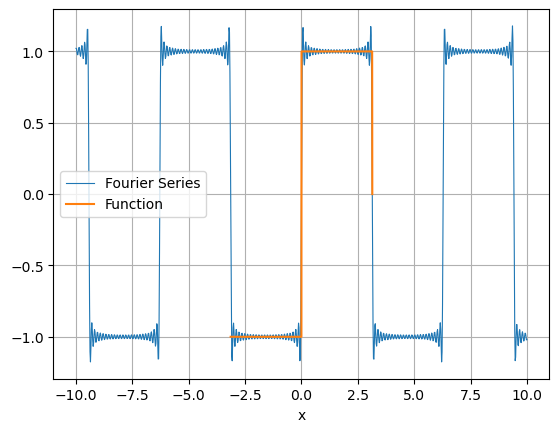

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps

# function
def f(x):
    if -np.pi<=x<0:
        return -1
    elif 0<=x<np.pi:
        return 1
    else:
        return 0

M1, M2 = -np.pi, np.pi         # period of x

x = np.linspace(M1, M2, 1000)
fx = np.array([f(i) for i in x])

a0 = 2/(M2-M1) * simps(fx, x)
an = lambda n: (2/(M2-M1)) * simps(fx*np.cos(n*np.pi*x*2/(M2-M1)), x)
bn = lambda n: (2/(M2-M1)) * simps(fx*np.sin(n*np.pi*x*2/(M2-M1)), x)

L1, L2 = -10, 10     # length of the signal
N = 50     # no. of terms in Fourier Series
xp = np.linspace(L1,L2,1000)
S = a0 * 0.5 + sum([an(n)* np.cos(n*np.pi*xp*2/(M2-M1)) + 
                    bn(n)*np.sin(n*np.pi*xp*2/(M2-M1)) for n in range (1,N)])

print('Fourier Coefficients:')
print(f'a0 = {a0}')
for n1 in range(11):
    print(f'n = {n1}, \t a{n1} = {an(n1)}, \t b{n1} = {bn(n1)}')

import matplotlib.pyplot as plt
plt.plot(xp, S, lw=0.8, label='Fourier Series')
plt.plot(x, fx, label='Function')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

## Question 6
Sine series computed from recurrence reation.

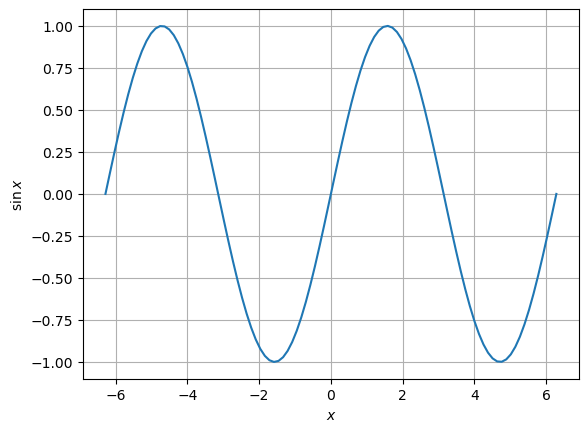

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.0*np.pi, 2.0*np.pi, 100)
a = 1.0
n = 100
sum = 1.0
for i in range(1,n+1):
    a = (-1)*(x**2)*a/(2*i*(2*i+1))
    sum += a
sum = sum*x

plt.plot(x,sum)
plt.xlabel('$x$')
plt.ylabel('$\sin x$')
plt.grid()
plt.show()

Computation of $\sin(6)$:

In [6]:
import numpy as np

x = 6
a = 1.0
nmax = 100
sum = 1.0
for n in range(1,nmax+1):
    a = (-1)*(x**2)*a/(2*n*(2*n+1)) 
    # a is the (n+1)th term in lhs nth term in rhs
    sum += a
sum = sum*x

print(f'Value of sin6 by using recurrence formula: {sum}. ({nmax} no. of terms used)')
print(f'Value of sin6 by using numpy function: {np.sin(6)}')

Value of sin6 by using recurrence formula: -0.27941549819892436. (100 no. of terms used)
Value of sin6 by using numpy function: -0.27941549819892586


## Question 7
Plot first 6 Legendre Polynomials from $x=-1$ to $x=1$.

### Solution:
The recurrence relation is,
$$ P_n(x) = \frac{2n-1}{n} xP_{n-1}(x) - \frac{n-1}{n} P_{n-2}(x) $$
Given, $P_0(x)=1$ and $P_1(x)=x$.

In [7]:
def recPn(n,x):
    P0 = 1
    P1 = x
    
    if n == 0:
        Pn = P0
    elif n == 1:
        Pn = P1
    else:
        Pn_1, Pn_2 = P1, P0

    for i in range(2, n+1):
        Pn = (2*i - 1)/i*x*Pn_1 - (i - 1)/i*Pn_2
        Pn_1, Pn_2 = Pn, Pn_1
    return Pn

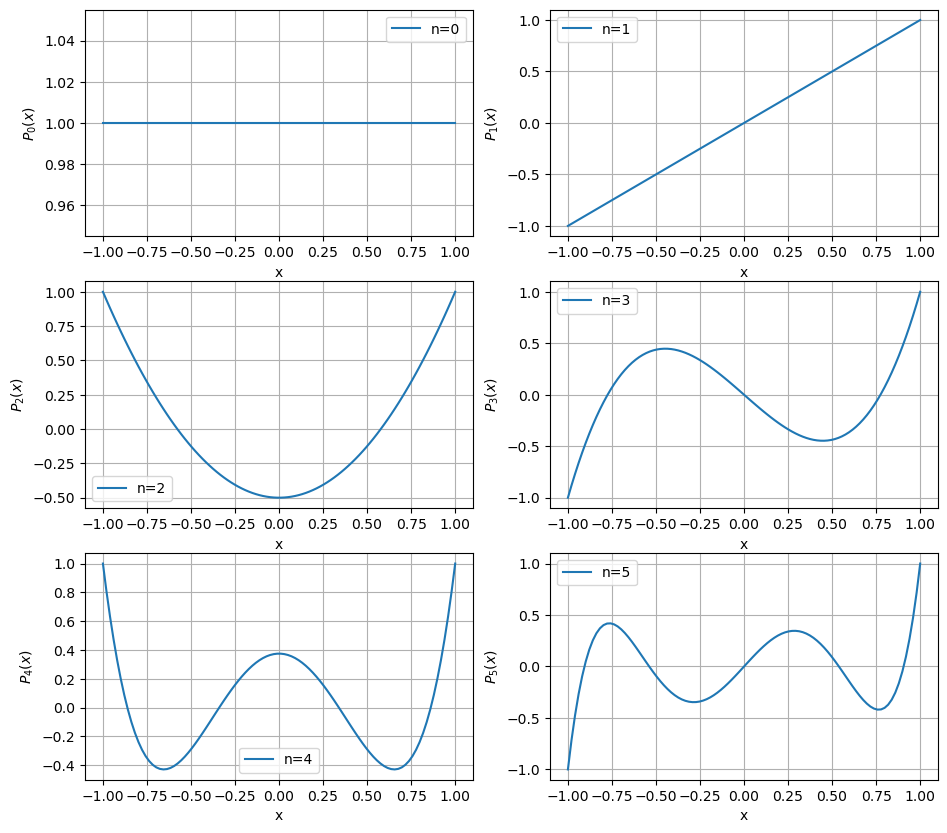

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)

plt.figure(figsize=(11,10))
for n in range(6):
    recPnplot = [recPn(n,x[i]) for i in range(len(x))]
    plt.subplot(3,2,n+1)
    plt.plot(x, recPnplot, label=f'n={n}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel(f'$P_{n}(x)$')
    plt.grid()
plt.show()

## Question 9
Program to sum numerically: 
$$ \sum_{n=1}^{\infty} (0.2)^n $$

In [9]:
nmax = 1000   # the upper limit of sum
a = 0
for i in range(1,nmax+1):
    a = a + 0.2**i  

print(f'Sum of the series = {a}. (Using {nmax} no. of terms)')

Sum of the series = 0.2500000000000001. (Using 1000 no. of terms)


## Question 10
$ n^{th} $ Root of Unity:

$$ x^n = 1 = e^{i(2\pi k)} $$

$$ x = e^{\dfrac{2 \pi i k}{n}} = \cos\left(\frac{2 \pi k}{n}\right) + i \sin\left(\frac{2 \pi k}{n}\right) $$

In [10]:
import numpy as np

def general_root(k,n):
    if n<=0:
        return None
    return np.exp(1j*(2*np.pi*k)/n)

print(' roots for n=2:')
n = 2   # put an integer
for k in range(n):
    print(general_root(k,n))
    
print('\n roots for n=3:')
n = 3   # put an integer
for k in range(n):
    print(general_root(k,n))

print('\n roots for n=4:')
n = 4   # put an integer
for k in range(n):
    print(general_root(k,n))

 roots for n=2:
(1+0j)
(-1+1.2246467991473532e-16j)

 roots for n=3:
(1+0j)
(-0.4999999999999998+0.8660254037844387j)
(-0.5000000000000004-0.8660254037844385j)

 roots for n=4:
(1+0j)
(6.123233995736766e-17+1j)
(-1+1.2246467991473532e-16j)
(-1.8369701987210297e-16-1j)


## Question 11
Square Root of $(-5 + 12i)$

$$ \sqrt{x+iy} = \sqrt{r} \cos(\theta/2) + i \sqrt{r} \sin(\theta/2) = \sqrt{r} e^{i \theta /2} $$

where $ r = \sqrt{x^2+y^2} $ and $ \tan\theta = \frac{y}{x} $

In [11]:
import numpy as np

# Values of x and y
x, y = -5, 12

r = (x**2 + y**2)**0.5
th = np.arctan(y/x)
root = r**0.5 * np.exp(1j*th/2)
print(root)

(2.9999999999999996-2j)
